https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering



Resources:


http://library.isical.ac.in:8080/jspui/bitstream/10263/3870/1/genetic%20algorithm.pdf?ref=blog.paperspace.com

https://blog.paperspace.com/clustering-using-the-genetic-algorithm/

https://pygad.readthedocs.io/en/latest/?ref=blog.paperspace.com




In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
pip install pygad

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import warnings
import pygad
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import opendatasets as od

od.download("https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data")
X, _ = load_wine(return_X_y=True)

global num_clusters, feature_vector_length, data


Skipping, found downloaded files in "./wine-dataset-for-clustering" (use force=True to force download)


/content/wine-dataset-for-clustering/wine-clustering.csv

In [ ]:
data = pd.read_csv("/content/wine-dataset-for-clustering/wine-clustering.csv")
data = data.dropna()
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


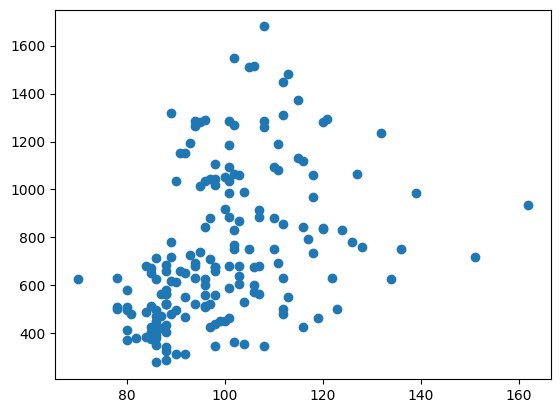

In [ ]:
x_axis = data.loc[:, ['Magnesium']]
y_axis = data.loc[:, ['Proline']]
features = data[['Magnesium', 'Proline']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

plt.scatter(x_axis, y_axis)

# Tuning Model: K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
pred = kmeans.fit_predict(features_scaled)
labels = kmeans.labels_
pred

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int32)

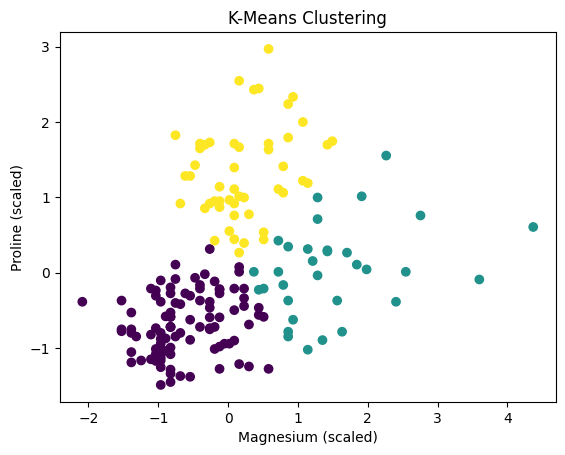

In [ ]:
plt.scatter(x=features_scaled[:, 0], y=features_scaled[:, 1], c=pred)
plt.xlabel('Magnesium (scaled)')
plt.ylabel('Proline (scaled)')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
score = silhouette_score(features_scaled, labels, metric='euclidean')
print("Silhouette Score:", score)

Silhouette Score: 0.4897130132079989


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# Grid and Random Search Implementations

In [ ]:
from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(set(cluster_labels)) == 1:    # Guard against a single cluster scenario
        return -1
    score = silhouette_score(X, cluster_labels, metric='euclidean')
    return score

param_grid = {
    'n_clusters': [2, 3, 4, 5],          # Number of clusters (k)
    'init': ['k-means++', 'random'],     # Initialization method
    'n_init': [10, 20, 30]               # Number of initializations
}

kmeans = KMeans()

grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

grid_search.fit(features_scaled)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best Parameters:", best_params_grid)
print("Best Silhouette Score:", best_score_grid)

# Plotting
kmeans_best = KMeans(n_clusters=best_params_grid['n_clusters'], init=best_params_grid['init'], n_init=best_params_grid['n_init'], random_state=42)
kmeans_best.fit(features_scaled)
cluster_labels = kmeans_best.labels_
centroids = kmeans_best.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6, label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.xlabel('Magnesium (scaled)')
plt.ylabel('Proline (scaled)')
plt.title('Grid Search Clustering Results with K-Means')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_clusters': randint(2, 6),          # Number of clusters (k)
    'init': ['k-means++', 'random'],      # Initialization method
    'n_init': randint(10, 31)             # Number of initializations
}

random_search = RandomizedSearchCV(kmeans, param_dist, n_iter=50, cv=5, scoring=silhouette_scorer)

random_search.fit(features_scaled)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters:", best_params_random)
print("Best Silhouette Score:", best_score_random)

#Random Search by sklearn library is only intended for supervised learning. Oops. There is not structure for the unsupervised environment.

# Genetic Algorithm Implementation

In [ ]:
def fitness_func(ga_instance, solution, solution_idx):
    k = int(solution[0])  # Ensure k is an integer

    if k < 2:  # Silhouette score requires at least 2 clusters
        return -1

    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(features_scaled)

    score = silhouette_score(features_scaled, labels)

    return score

In [ ]:
num_clusters = 3
feature_vector_length = data.shape[1]
num_genes = 1

ga_instance = pygad.GA(num_generations=500,
                       sol_per_pop=30,
                       init_range_low=2,
                       init_range_high=89,
                       num_parents_mating=5,
                       keep_parents=2,
                       num_genes=num_genes,
                       gene_type=int,
                       crossover_type="single_point",
                       crossover_probability=0.9,
                       mutation_type="random",
                       mutation_probability=0.2,
                       random_mutation_min_val=2,
                       random_mutation_max_val=30,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))



In [ ]:
optimized_k = int(best_solution[0])

kmeans = KMeans(n_clusters=optimized_k)
kmeans.fit(features_scaled)

clusters = kmeans.predict(features_scaled)

# Plotting
plt.figure(figsize=(10, 7))

for cluster in range(optimized_k):
    cluster_points = features_scaled[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids', marker='*')

plt.title("Clustering using GA Optimized k-Means")
plt.xlabel("Feature 1: Magnesium scaled")
plt.ylabel("Feature 2: Proline scaled")
plt.legend()
plt.show()

## For Comparison

In [ ]:
import time


data = load_wine()
X = StandardScaler().fit_transform(data.data)


def runGrid():
    def silhouette_scorer(estimator, X):
        cluster_labels = estimator.fit_predict(X)
        if len(set(cluster_labels)) == 1:
            return -1
        score = silhouette_score(X, cluster_labels, metric='euclidean')
        return score

    param_grid = {
        'n_clusters': [2, 3, 4, 5],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30]
    }

    kmeans = KMeans()
    grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
    grid_search.fit(features_scaled)

    best_params_grid = grid_search.best_params_
    best_score_grid = grid_search.best_score_

    print("Best Parameters:", best_params_grid)
    print("Best Silhouette Score:", best_score_grid)

    return best_score_grid


def runRandom():
    param_dist = {
        'n_clusters': randint(2, 6),
        'init': ['k-means++', 'random'],
        'n_init': randint(10, 31)
    }

    random_search = RandomizedSearchCV(kmeans, param_dist, n_iter=50, cv=5, scoring=silhouette_scorer)

    random_search.fit(features_scaled)

    best_params_random = random_search.best_params_
    best_score_random = random_search.best_score_

    print("Best Parameters:", best_params_random)
    print("Best Silhouette Score:", best_score_random)
    return best_score_random


def runGen():
    num_clusters = 3
    feature_vector_length = X.shape[1]
    num_genes = 1

    ga_instance = pygad.GA(num_generations=500,
                          sol_per_pop=30,
                          init_range_low=2,
                          init_range_high=89,
                          num_parents_mating=5,
                          keep_parents=2,
                          num_genes=num_genes,
                          gene_type=int,
                          crossover_type="single_point",
                          crossover_probability=0.9,
                          mutation_type="random",
                          mutation_probability=0.2,
                          random_mutation_min_val=2,
                          random_mutation_max_val=30,
                          fitness_func=fitness_func,
                          suppress_warnings=True)

    ga_instance.run()

    best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
    print("Best solution is {bs}".format(bs=best_solution))
    print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
    return best_solution_fitness

def optimize_with_ga(X):
    ga_score = runGen()
    start_time = time.time()
    best_score = ga_score
    execution_time = time.time() - start_time
    return best_score, execution_time

def optimize_with_grid_search(X):
    grid_score = runGrid()
    start_time = time.time()
    best_score = grid_score
    execution_time = time.time() - start_time
    return best_score, execution_time

def optimize_with_random_search(X):
    rando_score = runRandom()
    start_time = time.time()
    best_score = rando_score
    execution_time = time.time() - start_time
    return best_score, execution_time


methods = ["Genetic Algorithm", "Grid Search", "Random Search"]
optimization_functions = [optimize_with_ga, optimize_with_grid_search, optimize_with_random_search]
results = []

for method, optimize in zip(methods, optimization_functions):
    best_score, execution_time = optimize(X)
    results.append({"Method": method, "Best Silhouette Score": best_score, "Execution Time (s)": execution_time})

results_df = pd.DataFrame(results)


results_df.to_csv("optimization_comparison_results.csv", index=False)

results_df.to_csv("optimization_comparison_results.txt", sep="\t", index=False)
